# 151_A / Anfrage Primus Präzisionstechnik Spoiler

Kenndaten 
* max. Durchmesser 24mm
* Leerlaufdrehzahl max. 7500 1/min
* Spannung 13,2V
* Anlaufmoment ca. 3,8 Ncm
* Applikation: PKW Spoiler
* Stückzahl: ca. 30.000 – 40.000 p.A.
* Innenliegende Entstörung gewünscht.
* Optional Encoder
* Ansteuerung Festspannung altern. PWM
* Kein Neodym-Magnet
* Baulänge egal
* Motor bekommt A-seitig 2- oder 3- gängige montiert. 
* Langsamere Drehzahl bei gleicher Leistung möglich (Drehmoment höher)
* Anschluss mit Litzen (Stecker tbd)

* Lebensdauer (Zyklen, Fahrzeiten)
 * 50.000 Zyklen á ca. 15 Sek. auf (8 Sek) /zu (7 Sek)
* eine genauere Beschreibung der Lastmomente (kommt es zur Blockfahrt, was sind die maximalen Momente und über welche Zeit bestehen diese) 
 * ja – Blocklauf ca. 1 Sek 
* Nennpunkt ca. 1 Ncm
* Wie genau muss der Encoder sein? Reicht ein Hallsensor? Wieviele PPR werden benötigt?
 * Hall ist ok. 1 altern. 2 Kanal (2 oder 4 Pulse pro Umdrehung)
* Wie sehen die Temperatur-Anforderungen aus?
 * -40°C – 80°C - Prüfzyklus max. 110°C

Was genau ist der Grund auf einen Neodym-Magneten zu verzichten? Geht es da um Konfliktmineralien?
Konfliktmaterialien und keine Entmagnetisierung zulässig

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from MotorCalc import *

## Anforderungen

In [9]:
########################
# Customer requirements 
########################

# Customer voltage [V]
U_C = 13.2
# Working point speed [rpm]
n_WP = 5530
# Working point torque [Nm]
M_WP = 0.010
# max Torque [Nm]
M_max = 0.038
# min speed [rpm] (45cpm)
n_min = 2000
#max. motor height [mm]
height_max = []
#max. motor diameter [mm]
D_max = 24

# desired max mech. power
P_mech_des_max = M_max * n_min * np.pi/30.0
# mech. power at working point
P_mech_WP = M_WP * n_WP * np.pi/30.0

print('desired max. mech. Power {:0.2f}W'.format(P_mech_des_max))
print('desired mech. Power at WP {:0.2f}W'.format(P_mech_WP))


desired max. mech. Power 7.96W
desired mech. Power at WP 5.79W


## Test Nichibo RK-L250-18170-R-55-19129

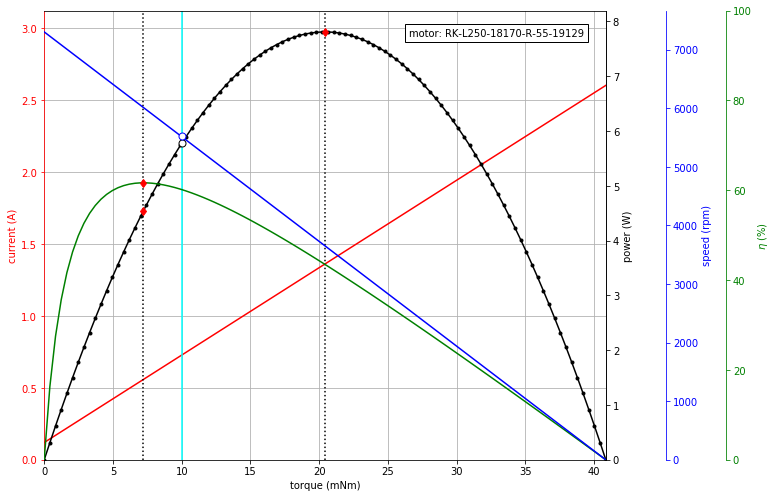

In [10]:
motor_name_Nichibo='RK-L250-18170-R-55-19129'
U_N = 13.2
I_S = 2.601
PWM_DC=1.0
R = U_N/I_S
n_0 = 7500
I_0 = 0.120
k_M = 416.335*9.81E-5/(I_S-I_0)

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_Nichibo)

m.plotCurves()

### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | rated Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

## Test Nichibo RK-L250-19135

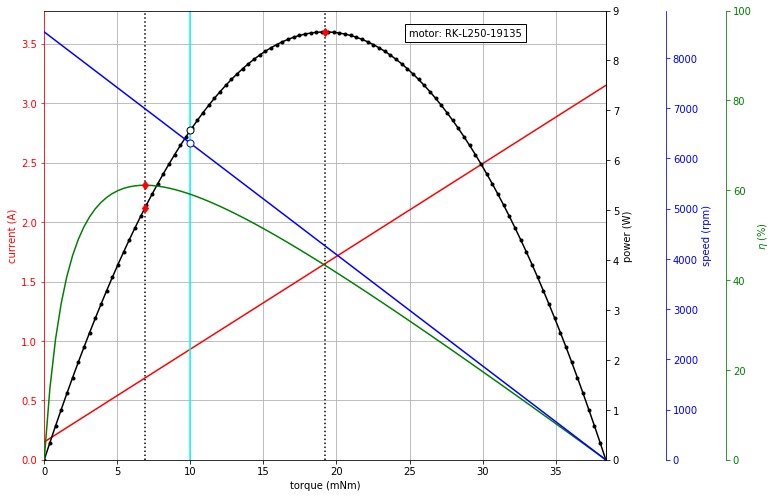

In [16]:
motor_name_Nichibo='RK-L250-19135'
U_N = 12.0
PWM_DC=1.0
R = 12.0/3.15
n_0 = 8500
I_0 = 0.15
k_M = 0.03843/(3.15-0.15)

m=CDCMotor(U_N=U_N*PWM_DC,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_Nichibo)

m.plotCurves()